<a href="https://colab.research.google.com/github/kirmanioussema12/Happiness-Report/blob/main/K-means-ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install seaborn

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/2019.csv")

In [7]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
df.shape

(156, 9)

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler ,LabelEncoder



In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


In [11]:
label_encoder = LabelEncoder()
df['Country or region'] = label_encoder.fit_transform(df['Country or region'])

In [12]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,43,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,36,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,105,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,57,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,98,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
dfnum=df.values

In [14]:
dfnum

array([[1.000e+00, 4.300e+01, 7.769e+00, ..., 5.960e-01, 1.530e-01,
        3.930e-01],
       [2.000e+00, 3.600e+01, 7.600e+00, ..., 5.920e-01, 2.520e-01,
        4.100e-01],
       [3.000e+00, 1.050e+02, 7.554e+00, ..., 6.030e-01, 2.710e-01,
        3.410e-01],
       ...,
       [1.540e+02, 0.000e+00, 3.203e+00, ..., 0.000e+00, 1.580e-01,
        2.500e-02],
       [1.550e+02, 2.400e+01, 3.083e+00, ..., 2.250e-01, 2.350e-01,
        3.500e-02],
       [1.560e+02, 1.280e+02, 2.853e+00, ..., 1.000e-02, 2.020e-01,
        9.100e-02]])

In [15]:
print (type(dfnum))

<class 'numpy.ndarray'>


In [16]:
from sklearn.preprocessing import StandardScaler
dfnum = StandardScaler().fit_transform(dfnum)
dfnum

array([[-1.72098328, -0.76611514,  2.12871112, ...,  1.4242823 ,
        -0.33540398,  2.99675712],
       [-1.69877704, -0.92155879,  1.97639663, ...,  1.39627687,
         0.70726491,  3.17715844],
       [-1.67657081,  0.61067149,  1.93493825, ...,  1.47329179,
         0.90737308,  2.4449413 ],
       ...,
       [ 1.67657081, -1.72098328, -1.98648391, ..., -2.74852598,
        -0.28274393, -0.90840093],
       [ 1.69877704, -1.18803362, -2.09463621, ..., -1.17322084,
         0.52822076, -0.8022825 ],
       [ 1.72098328,  1.12141491, -2.30192812, ..., -2.67851242,
         0.18066446, -0.20801932]])

In [17]:
matrice_cov=np.cov(dfnum.T)
matrice_cov.shape

(9, 9)

In [18]:
from numpy.linalg import eig
(valeurs_propres,vecteurs_propres)=eig(matrice_cov)
valeurs_propres.shape

(9,)

In [19]:
pourcentage_information=(valeurs_propres / valeurs_propres.sum())*100
pourcentage_information

array([52.10472725, 16.09274322, 11.34197563,  0.1025473 ,  1.74013838,
        2.65898555,  3.06646526,  6.71424899,  6.17816842])

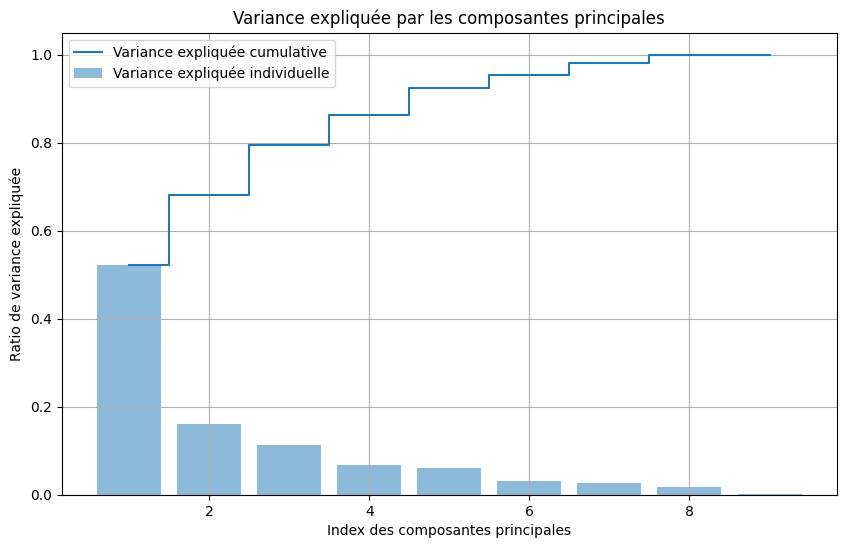

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que valeurs_propres contienne les valeurs propres de l'ACP
valeurs_propres = np.array([52.10472725, 16.09274322, 11.34197563, 0.1025473,
                            1.74013838, 2.65898555, 3.06646526, 6.71424899,
                            6.17816842])

# Calculer la somme totale des valeurs propres
tot = sum(valeurs_propres)

# Calculer la variance expliquée par chaque composante
var_exp = [i / tot for i in sorted(valeurs_propres, reverse=True)]

# Calculer la variance expliquée cumulative
cum_var_exp = np.cumsum(var_exp)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='Variance expliquée individuelle')
plt.step(range(1, len(var_exp) + 1), cum_var_exp, where='mid', label='Variance expliquée cumulative')
plt.ylabel('Ratio de variance expliquée')
plt.xlabel('Index des composantes principales')
plt.title('Variance expliquée par les composantes principales')
plt.legend(loc='best')
plt.grid()
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df)

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

Projecting 9-dimensional data to 2D


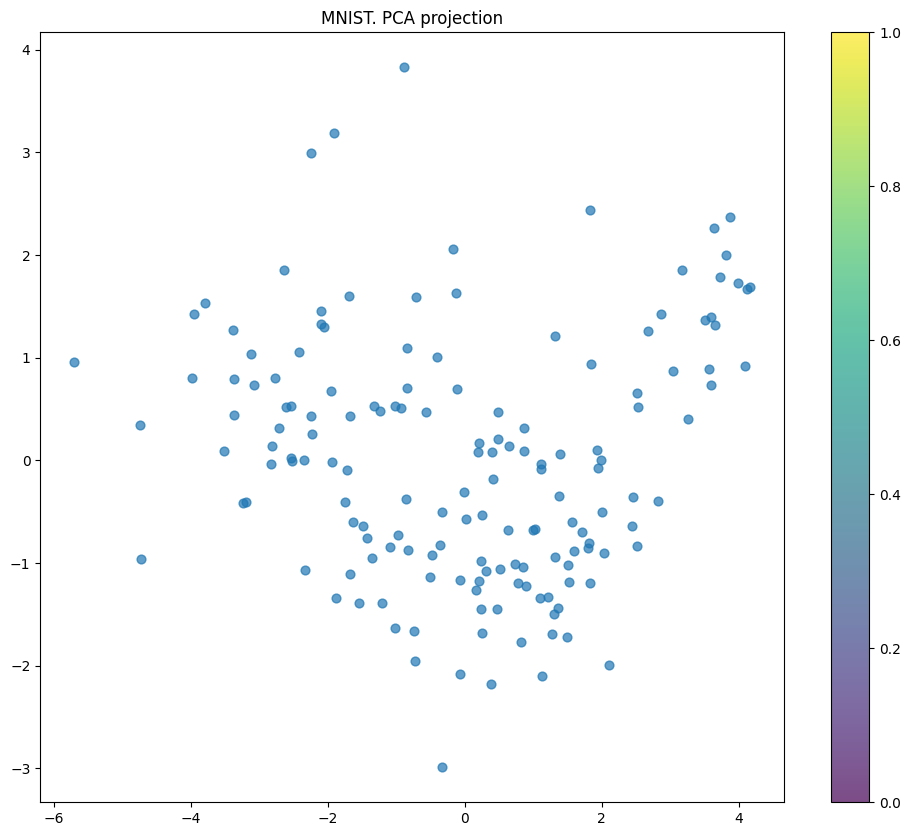

In [22]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], alpha=0.7, s=40);
plt.colorbar()
plt.title('MNIST. PCA projection');

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.001s...
[t-SNE] Computed neighbors for 156 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 1.498274
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.876858
[t-SNE] KL divergence after 1350 iterations: 0.328169


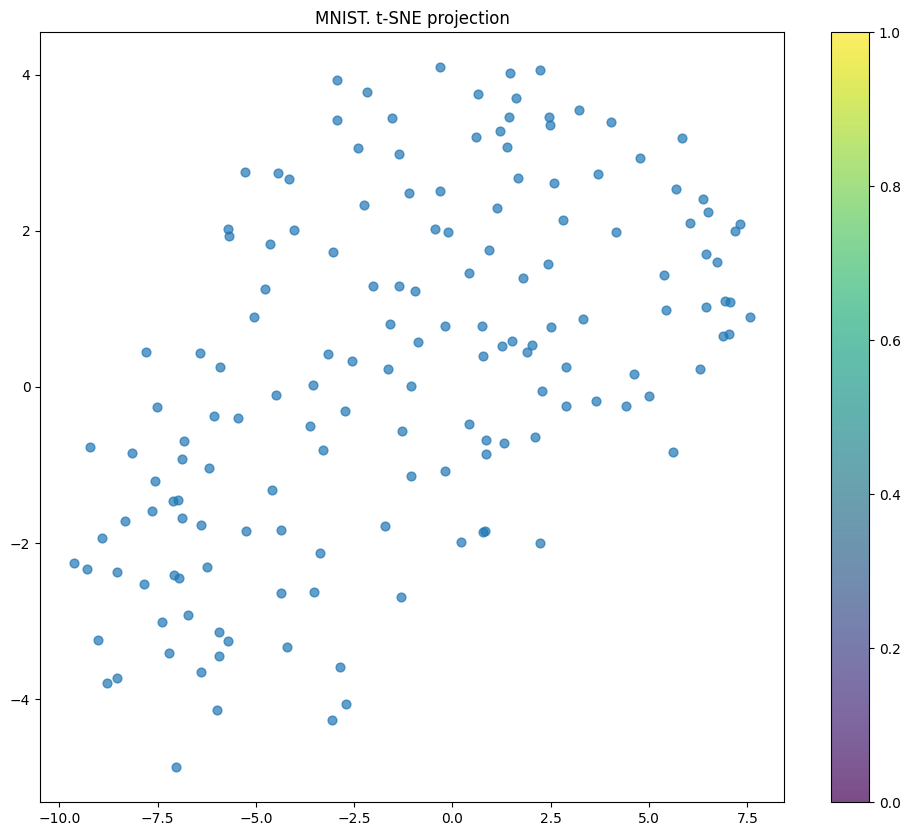

In [23]:
# Invoke the TSNE method
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000,random_state = 17)

df_tsne_scaled = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12,10))
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1],
            alpha=0.7, s=40)
plt.colorbar()
plt.title('MNIST. t-SNE projection');

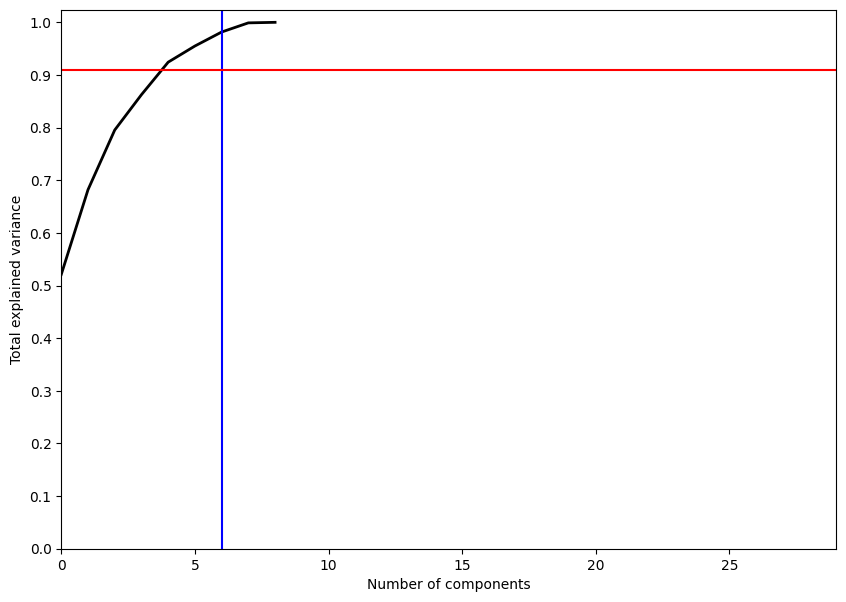

In [24]:
pca = decomposition.PCA().fit(X_scaled)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='r')
plt.show();

In [37]:
kmeans = KMeans(n_clusters= 3, random_state=42)
kmeans.fit(X_pca_scaled)
clusters = kmeans.labels_

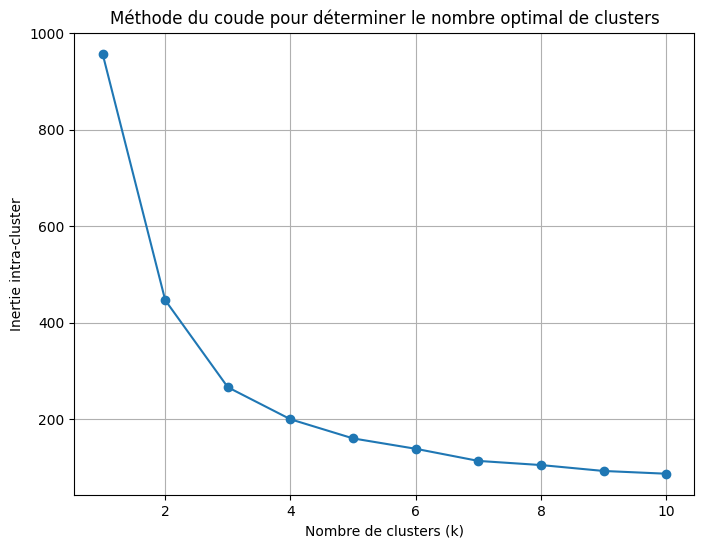

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Liste pour stocker les inerties
inertias = []

# Test de k de 1 à 10 (nombre de clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_scaled)  # Assurez-vous que X_pca_scaled contient les données prétraitées (ex: après PCA)
    inertias.append(kmeans.inertia_)

# 3. Tracer la courbe de la méthode du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie intra-cluster')
plt.grid(True)
plt.show()

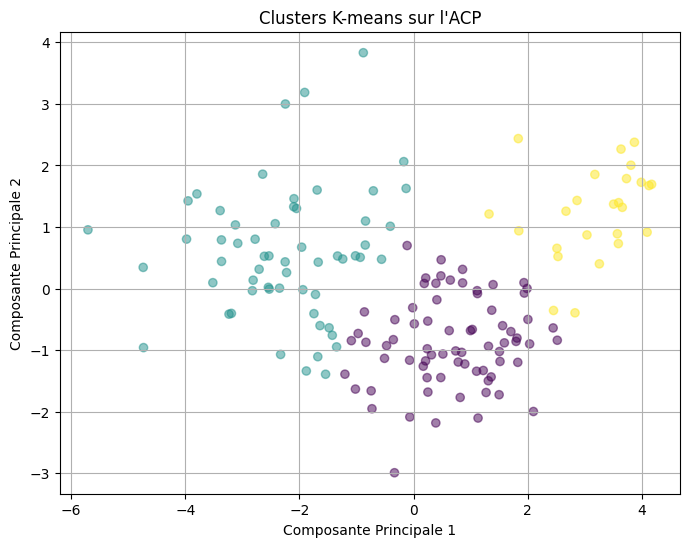

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Clusters K-means sur l\'ACP')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid()
plt.show()

In [35]:
cfrom scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np


Z = linkage(X_pca_scaled, method='ward')
clusters = fcluster(Z, t=3, criterion='maxclust')


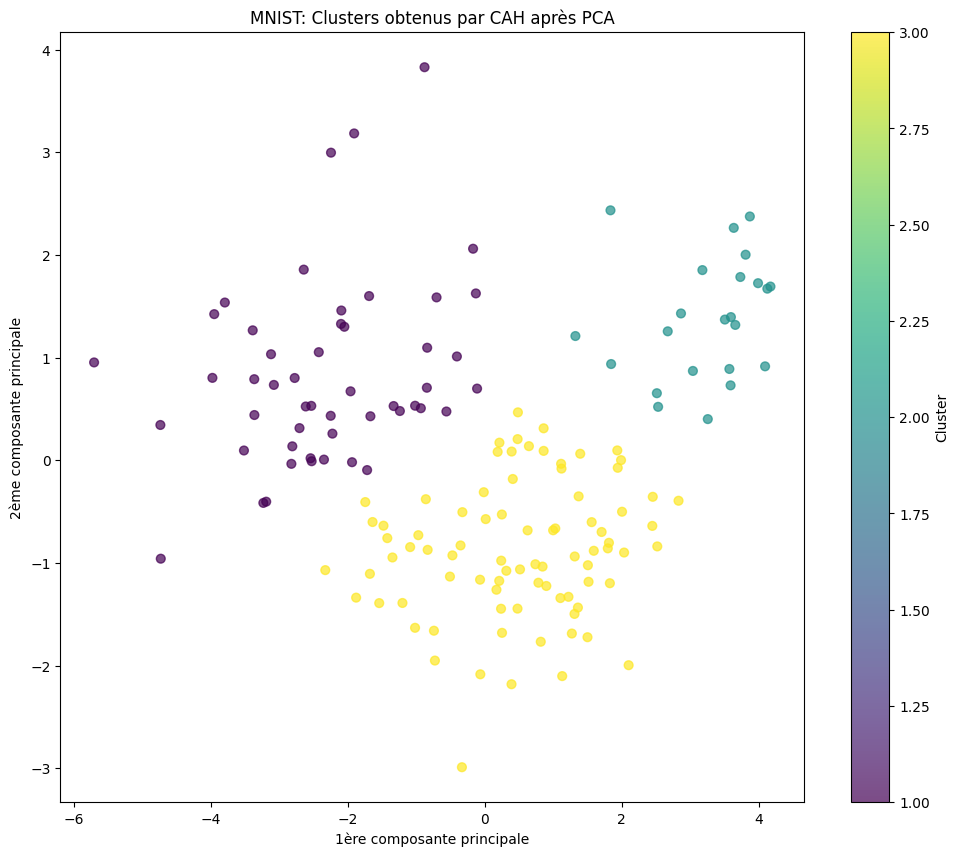

In [36]:

plt.figure(figsize=(12, 10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.7, s=40)
plt.colorbar(label='Cluster')
plt.title('MNIST: Clusters obtenus par CAH après PCA')
plt.xlabel('1ère composante principale')
plt.ylabel('2ème composante principale')
plt.show()


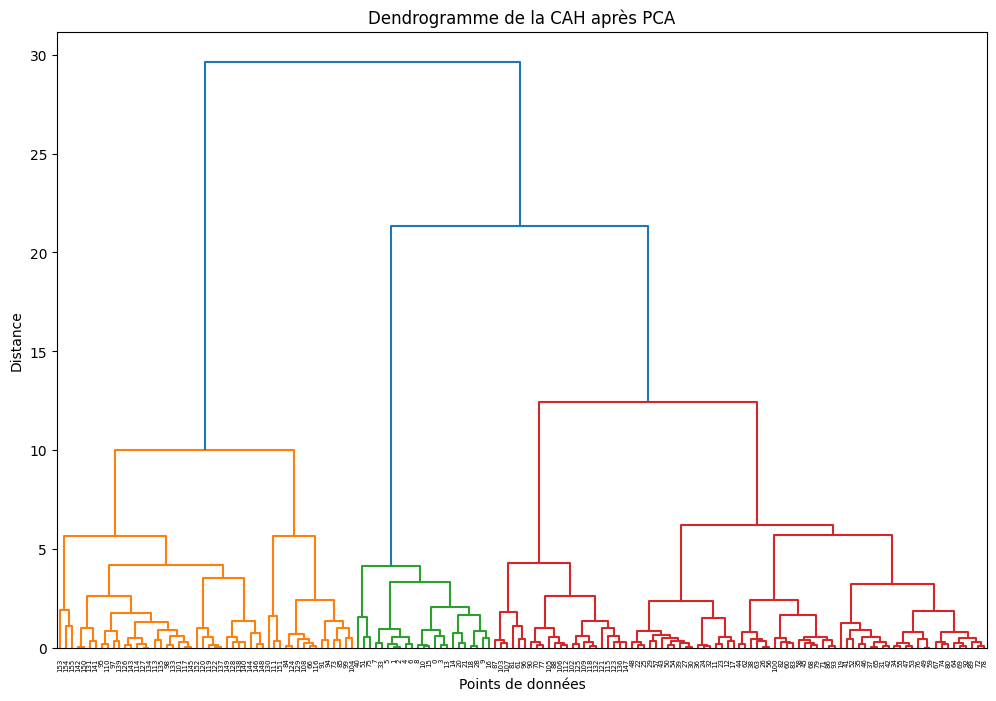

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np


Z = linkage(X_pca_scaled, method='ward')


plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogramme de la CAH après PCA')
plt.xlabel('Points de données')
plt.ylabel('Distance')
plt.show()

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import linkage, fcluster

# Supposons que vos données PCA réduites soient stockées dans X_pca_scaled

# 1. Appliquer K-Means avec 4 clusters (adaptable selon vos données)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca_scaled)
kmeans_clusters = kmeans.labels_

# 2. Appliquer CAH avec la méthode 'ward' et découper pour obtenir 4 clusters (adaptable selon vos besoins)
Z = linkage(X_pca_scaled, method='ward')
cah_clusters = fcluster(Z, t=4, criterion='maxclust')  # Choisir le bon nombre de clusters

# 3. Créer la matrice de contingence (correspondance entre les clusters K-Means et CAH)
contingency_matrix = confusion_matrix(cah_clusters, kmeans_clusters)

# 4. Vérifier la taille réelle de la matrice de contingence (nombre de clusters)
num_clusters = contingency_matrix.shape[0]  # Récupérer le nombre de clusters

# 5. Créer une DataFrame pour une meilleure lisibilité avec des noms de clusters dynamiques
contingency_df = pd.DataFrame(contingency_matrix,
                              columns=[f'KMeans Cluster {i}' for i in range(1, num_clusters+1)],
                              index=[f'CAH Cluster {i}' for i in range(1, num_clusters+1)])

# 6. Afficher la matrice de correspondance
print("Matrice de correspondance entre CAH et K-Means :")
print(contingency_df)




Matrice de correspondance entre CAH et K-Means :
               KMeans Cluster 1  KMeans Cluster 2  KMeans Cluster 3  \
CAH Cluster 1                 0                 0                 0   
CAH Cluster 2                 0                35                 0   
CAH Cluster 3                 0                 0                23   
CAH Cluster 4                 3                 0                 0   
CAH Cluster 5                54                 0                 0   

               KMeans Cluster 4  KMeans Cluster 5  
CAH Cluster 1                 0                 0  
CAH Cluster 2                15                 0  
CAH Cluster 3                 0                 0  
CAH Cluster 4                20                 0  
CAH Cluster 5                 6                 0  
